# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)

## Introduction/Background

The dataset that I am using is the Coronavirus tweets NLP - Text Classification from kaggle. The data is from twitter and it is manually tagged with the tweet informations such as @ handles, date, tweet content and with name and @ handles replaced with code to avoid any privacy concerns. This is a text classification problem since
This is a __text classification__ problem since we are categorizing Sentiment random tweets into predetermined categories of sentiments such as negative, positive and others. By definition, we are automatically analyzing and categorizing text into a number of predetermined categories.


## Exploratory Data Analysis

_You will now load the dataset and carry out some exploratory data analysis steps to better understand what text data looks like. See the examples from class on 10/. The following links provide some good resources of exploratory analyses of text data with Python._


* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [1]:
# import all of the python modules/packages you'll need here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import datasets
from datasets import Dataset , Sequence , Value , Features , ClassLabel , DatasetDict
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df_train = pd.read_csv("../input/covid-19-nlp-text-classification/Corona_NLP_train.csv",encoding='latin')
df_test = pd.read_csv('../input/covid-19-nlp-text-classification/Corona_NLP_test.csv',encoding='latin')

In [3]:
print(df_train.shape)
print(df_train.columns)
df_train.head()

(41157, 6)
Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Drop unnessessary collumns and duplicates

In [4]:
df_train.drop(columns = ['UserName','ScreenName','Location','TweetAt'], inplace=True)
df_train.drop_duplicates(subset='OriginalTweet', inplace=True)
df_train = df_train.reset_index(drop=True)
df_train.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Total sentiments and word per tweet satistics

In [6]:
df_train["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

1 64


<AxesSubplot:xlabel='Word lengths', ylabel='Count'>

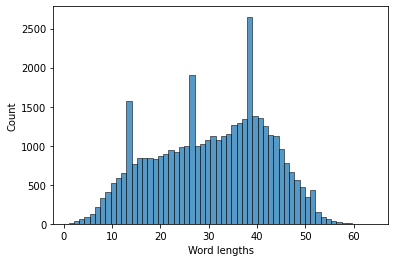

In [8]:
df_train['Word lengths'] = df_train['OriginalTweet'].apply(lambda t: len(t.split()))
min_len_word, max_len_word = df_train['Word lengths'].min(), df_train['Word lengths'].max()
print(min_len_word, max_len_word)
sns.histplot(df_train['Word lengths'])

In [13]:
df_train.describe()

,Word lengths
count,41157.000000
mean,30.500304
std,11.591172
min,1.000000
25%,21.000000
50%,32.000000
75%,40.000000
max,64.000000


In [17]:
def count_stopwords(text, stopwords):
    ''' Return the number of stopwords in the text
        Input:
            - text: string
            - stopwords: list of string, containing the stopwords
        Output:
            - int, number of stopwords in the text argument
    '''
    word_tokens = word_tokenize(text) #splitta i pezzi
    stopwords_x = [w for w in word_tokens if w in stopwords]
    
    return len(stopwords_x)
  
# Create a new variable containing the number of sentences in the OriginalTweet
df_train['sum_sent_count'] = df_train['OriginalTweet'].apply(lambda x : len(split_sentences(x)))
# Create a new variable containing the number of word in the OriginalTweet
df_train['sum_word_count'] = df_train['OriginalTweet'].apply(lambda x : len(x.split()))
# Create a new variable containing the number of characters in the OriginalTweet
df_train['sum_char_count'] = df_train['OriginalTweet'].apply(lambda x : len(x.replace(" ","")))
# Create a new variable containing the density of words in the OriginalTweet
df_train['sum_word_density'] = df_train['sum_word_count'] / (df_train['sum_char_count'] + 1)
# Create a new variable containing the density of sentences in the OriginalTweet
df_train['sum_sent_density'] = df_train['sum_sent_count'] / (df_train['sum_word_count'] + 1)
# Create a new variable containing the number of punctuations in the OriginalTweet
df_train['sum_punc_count'] = df_train['OriginalTweet'].apply(lambda x : len([a for a in x if a in punc]))
# Stopwords
# Create a new variable containing the number of stopwords in the OriginalTweet
df_train['sum_stopw_count'] =  df_train['OriginalTweet'].apply(lambda x : count_stopwords(x, stopwords))
# Create a new variable containing the density of stopwords in the OriginalTweet
df_train['sum_stopw_density'] = df_train['sum_stopw_count'] / (df_train['sum_word_count'] + 1)

NameError: name 'split_sentences' is not defined

Word Cloud

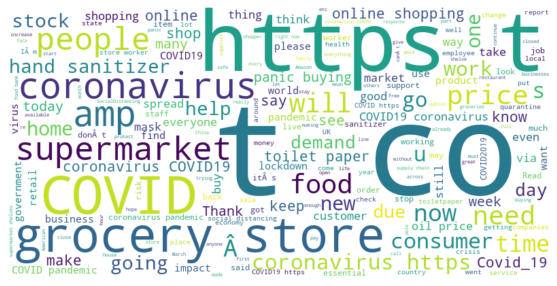

In [11]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(''.join(df_train.OriginalTweet))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()